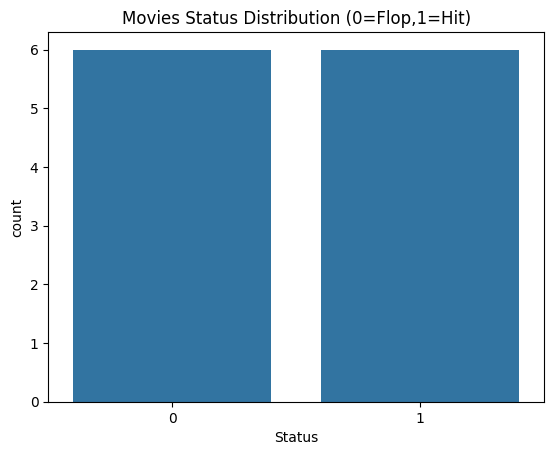

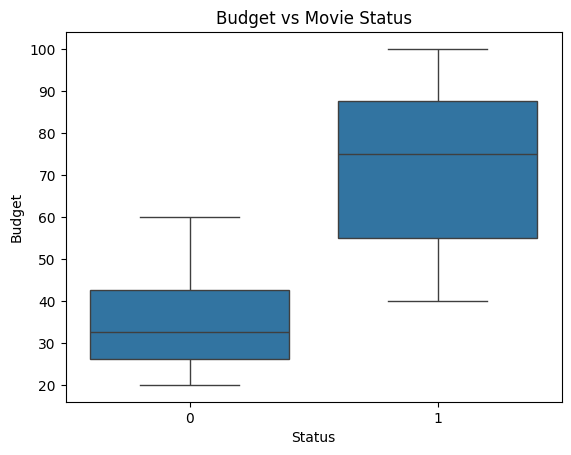

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 1.0

Decision Tree Accuracy: 1.0

Random Forest Accuracy: 1.0

Gradient Boosting Accuracy: 1.0

SVM Accuracy: 0.5


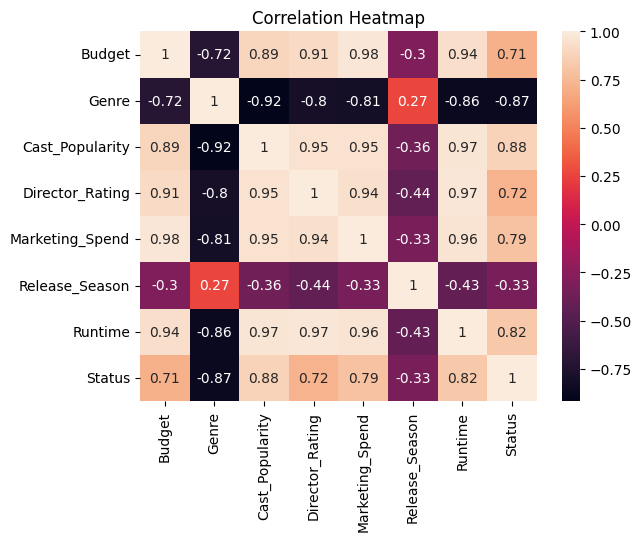

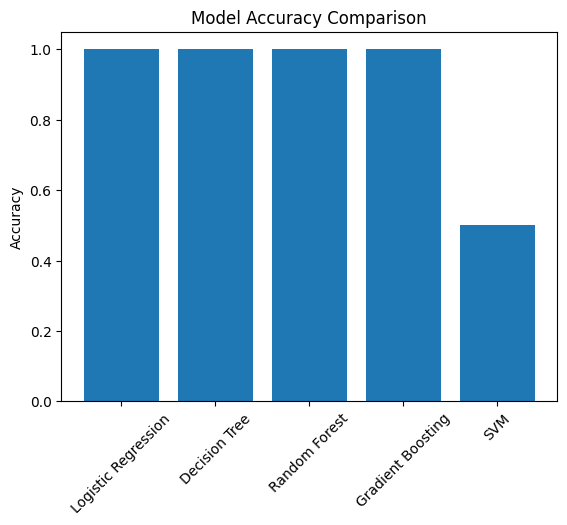

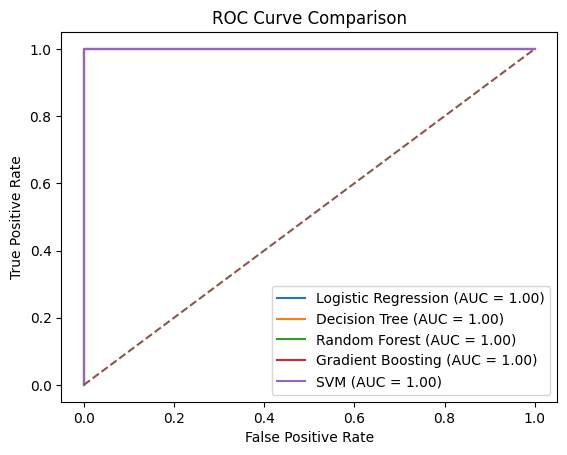


Best Model: Logistic Regression


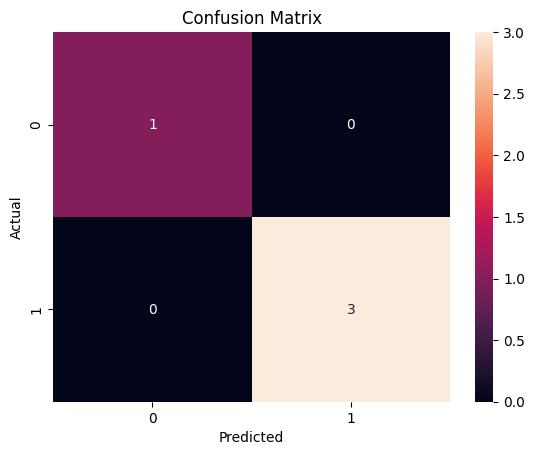


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback

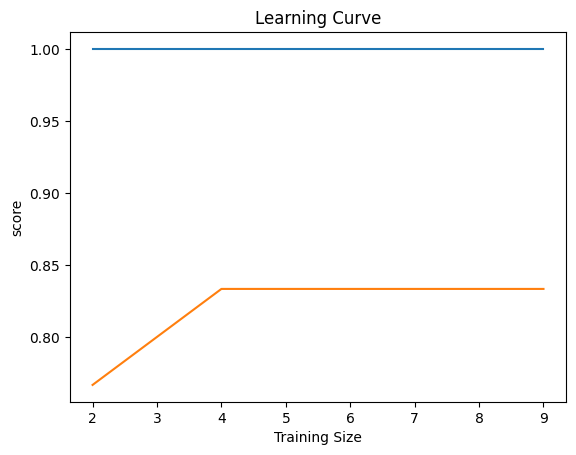

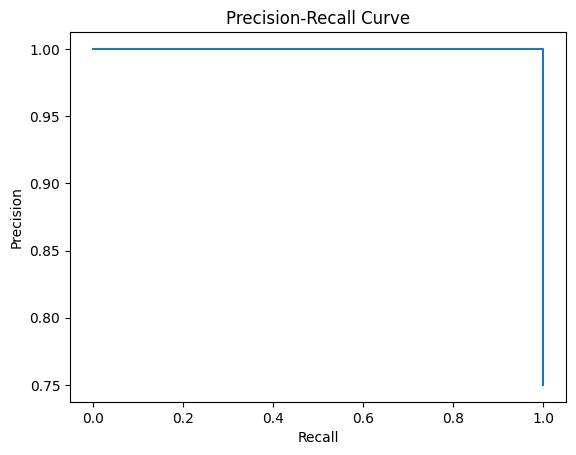


model saved as best_movie_model.pk1


In [33]:
from numpy.matrixlib import test
#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>
#🎥Movie Success Prediction                                |
#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split,learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report,roc_curve,
                             auc,precision_recall_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>
#1️⃣create dataset
#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>

df=pd.read_csv('movie_data.csv')


#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>
#2️⃣Encoding
#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>

le=LabelEncoder()
for col in ['Genre','Release_Season','Status']:
    df[col]=le.fit_transform(df[col])

#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>
#3️⃣Attractive Visulization
#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>

#count plot
plt.figure()
sns.countplot(x=df['Status'])
plt.title('Movies Status Distribution (0=Flop,1=Hit)')
plt.show()

#box plot
plt.figure()
sns.boxplot(x=df['Status'],y=df['Budget'])
plt.title('Budget vs Movie Status')
plt.show()

#correlation heatmap
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show

#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>
#4️⃣Train-Test-Split
#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>

X=df.drop('Status',axis=1)
y=df['Status']

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3,random_state=42)


#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>
#5️⃣Train multiple models
#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>

models={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Gradient Boosting':GradientBoostingClassifier(),
    'SVM':SVC(probability=True),

}

accuracies={}
roc_data={}

for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    accuracies[name]=acc

    y_prob=model.predict_proba(X_test)[:,1]
    fpr,tpr, _=roc_curve(y_test,y_prob)
    roc_auc=auc(fpr,tpr)
    roc_data[name]=(fpr,tpr,roc_auc)

    print(f"\n{name} Accuracy:", acc)

#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>
#6️⃣accuracy Comparison Graph
#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>

plt.figure()
plt.bar(accuracies.keys(),accuracies.values())
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>
#7️⃣ROC Curve
#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>

plt.figure()
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>
#8️⃣select best model
#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>
best_model_name=max(accuracies, key=accuracies.get)
best_model=models[best_model_name]

print("\nBest Model:",best_model_name)

#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>
#9️⃣confusion matrix
#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>

y_pred=best_model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

plt.figure()
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>
#🔟features importance(if available)
#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>

if hasattr(best_model,'feature_importances_'):
    plt.figure()
    plt.barh(X.columns,best_model.feature_importances_)
    plt.title('Feature Importance')
    plt.show()
#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>
#1️⃣1️⃣learning curve
#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>
train_sizes,train_scores,test_scores=learning_curve(
    best_model, X,y,cv=5)

plt.figure()
plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(train_sizes,np.mean(test_scores,axis=1))
plt.xlabel('Training Size')
plt.ylabel('score')
plt.title('Learning Curve')
plt.show()

#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>
#1️⃣2️⃣precision recall curve
#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>

y_prob=best_model.predict_proba(X_test)[:,1]
precision,recall,_=precision_recall_curve(y_test,y_prob)

plt.figure()
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>
#1️⃣3️⃣save best model
#>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>.>

joblib.dump(best_model,"best_movie_model.pk1")
print("\nmodel saved as best_movie_model.pk1")






